In [5]:
import pandas as pd 
import matplotlib 
import matplotlib.pyplot as plot
import numpy as np
import math

In [6]:
#This cell reads in the csv files and creates a new csv file showing the household data along with the total
#energy consumption over 4 years, and the daily average for the household

col_list1 = ['LCLid', 'stdorToU', 'Acorn', 'Acorn_grouped', 'file']

#read in initial data about households using the specified columns
df1 = pd.read_csv('informations_households.csv', usecols = col_list1, encoding = 'ISO-8859-1')

#initialize new sets data
rows = len(df1['LCLid'])
energy_sum = [0]*rows
energy_average = [0]*rows
counter = [0]*rows

#loop through each household ID
for i in range(len(df1['LCLid'])):
    block = df1['file'][i] + '.csv'
    df2 = pd.read_csv(block, encoding = 'ISO-8859-1')
    
    #find matching household id in block files to sum total energy consumption and find average daily energy use
    for j in range(len(df2['LCLid'])): 
        if df1['LCLid'][i] == df2['LCLid'][j]:
            counter[i] = counter[i] + 1
            energy_sum[i] = energy_sum[i] + df2['energy_sum'][j]
    energy_average[i] = energy_sum[i]/counter[i]
        
    #add new values to csv file 
    data = {'LCLid':df1['LCLid'], 'StdorToU':df1['stdorToU'], 'Acorn':df1['Acorn'], 'Acorn_grouped':df1['Acorn_grouped'], 'file':df1['file'], 'energy_sum':energy_sum, 'energy_average':energy_average}
    df_out = pd.DataFrame(data)
    df_out.to_csv('output.csv', index = False)

In [30]:
#This cell finds the average energy consumption for the specific Acorn group. 

#initialize variables 
acornType = [] 
acornAvg = []
group_average = []

#df_out = pd.read_csv('output.csv', encoding = 'ISO-8859-1')

#find all Acorn groups
for i in range(len(df_out['Acorn'])):
    if df_out['Acorn'][i] not in acornType:
        acornType.append(df_out['Acorn'][i])

#calculate the average daily energy per Acorn type
for j in range(len(acornType)):
    total = 0 
    counter = 0 
    for k in range(len(df_out['Acorn'])):
        if df_out['Acorn'][k] == acornType[j]:
            if math.isnan(df_out['energy_average'][k]) != True:
                total = total + df_out['energy_average'][k]
                counter = counter + 1
    acornAvg.append(total/counter)

#copy the acorn average to the output csv file 
for i in range (len(acornType)):
    for j in range(len(df_out['Acorn'])):
        if acornType[i] == df_out['Acorn'][j]:
            group_average.append(acornAvg[i])

df_out['group_average'] = group_average
df_out.to_csv('output.csv', index = False)

acornType.pop(0)
acornAvg.pop(0)
acornType.pop()
acornAvg.pop()

12.889593343856957

Text(0.5, 1.0, 'Acorn Type vs Daily Average Energy Consumption')

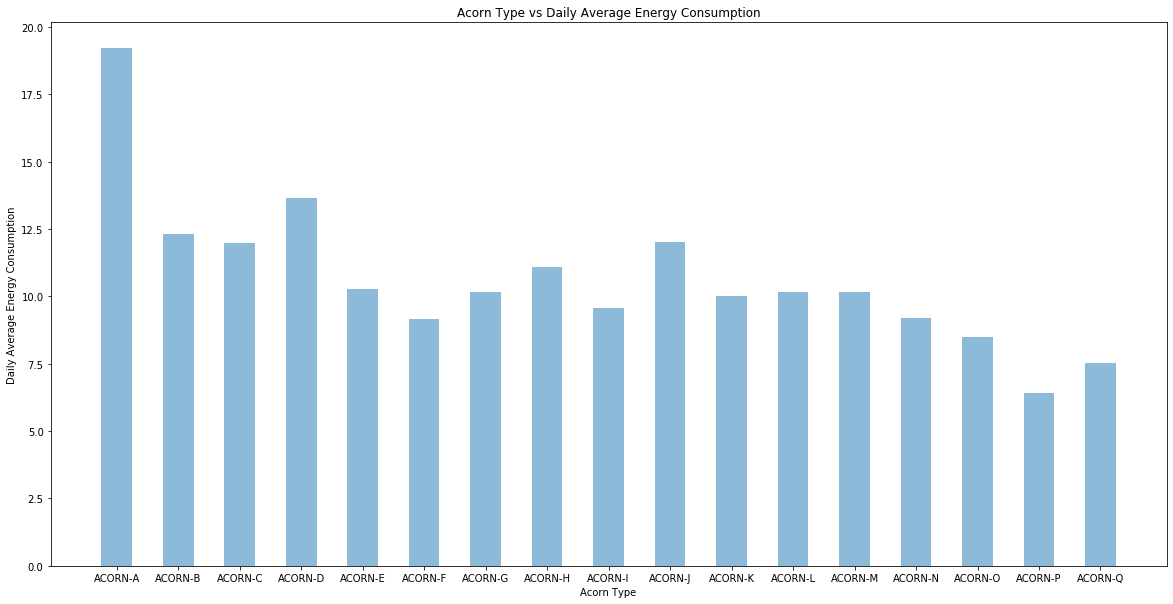

In [46]:
#This cell plots the acorn type versus the average daily usage for the group 

plot.figure(figsize = (20,10))
plot.bar(acornType, acornAvg, align = 'center', width = 0.5, alpha = 0.5)
plot.xlabel('Acorn Type')
plot.ylabel('Daily Average Energy Consumption')
plot.title('Acorn Type vs Daily Average Energy Consumption')

Text(0.5, 1.0, 'Tariff Type vs Daily Average Energy Consumption')

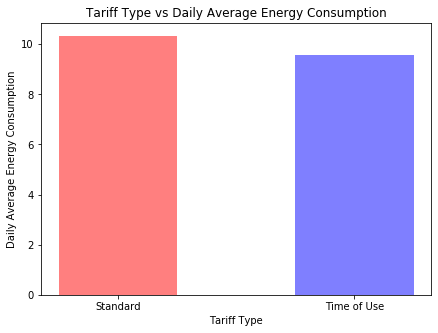

In [48]:
stdTotal = 0 
touTotal = 0 
stdCounter = 0 
touCounter = 0 

for i in range(len(df_out['LCLid'])):
    if df_out['StdorToU'][i] == 'Std':
        if math.isnan(df_out['energy_average'][i]) != True:
            stdTotal = stdTotal + df_out['energy_average'][i]
            stdCounter = stdCounter + 1
    elif df_out['StdorToU'][i] == 'ToU':
        if math.isnan(df_out['energy_average'][i]) != True:
            touTotal = touTotal + df_out['energy_average'][i]
            touCounter = touCounter + 1
            
stdTotal = stdTotal / stdCounter 
touTotal = touTotal / touCounter

values = [stdTotal, touTotal]
name = ['Standard', 'Time of Use']

plot.figure(figsize = (7, 5))
plot.bar(name, values, align = 'center', width = 0.5, alpha = 0.5, color = ['Red', 'Blue'])
plot.xlabel('Tariff Type')
plot.ylabel('Daily Average Energy Consumption')
plot.title('Tariff Type vs Daily Average Energy Consumption')

In [26]:
#this cell reads in the outputted data and displays it as a dataframe 

df_final = pd.read_csv('output.csv', encoding = 'ISO-8859-1')
df_final.head(len(df_final['LCLid']))

,LCLid,StdorToU,Acorn,Acorn_grouped,file,energy_sum,energy_average,group_average
0,MAC005492,ToU,ACORN-,ACORN-,block_0,4149.144000,7.489430,15.255294
1,MAC001074,ToU,ACORN-,ACORN-,block_0,5225.802997,23.021159,15.255294
2,MAC000002,Std,ACORN-A,Affluent,block_0,6095.672001,12.070638,19.216641
3,MAC003613,Std,ACORN-A,Affluent,block_0,16724.290997,33.051958,19.216641
4,MAC003597,Std,ACORN-A,Affluent,block_0,14539.339994,28.677199,19.216641
...,...,...,...,...,...,...,...,...
5561,MAC002056,Std,ACORN-U,ACORN-U,block_111,1940.108000,3.572943,12.889593
5562,MAC004587,Std,ACORN-U,ACORN-U,block_111,17291.837007,28.916115,12.889593
5563,MAC004828,Std,ACORN-U,ACORN-U,block_111,826.473000,1.189170,12.889593
5564,MAC001704,ToU,ACORN-U,ACORN-U,block_111,3430.459000,5.351730,12.889593


In [29]:
#This cell shows a correlation map 

df_final.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,energy_sum,energy_average,group_average
energy_sum,1,0.95,0.26
energy_average,0.95,1,0.3
group_average,0.26,0.3,1
